# Klasyfikacja obrazów z użyciem Keras

In [1]:
import numpy as np
import pandas as pd

from tqdm import *
from keras import *
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

### Wyodrębnienie zbioru treningowego i walidacyjnego

In [2]:
train_df = pd.read_csv("sources/signs/Train.csv")

In [3]:
train_images = []

for i in tqdm(range(train_df.shape[0])):
    img = utils.load_img(
        "sources/signs/" + train_df['Path'][i],
        target_size = (28,28,3) # Określa, że docelowe zdjęcie ma mieć 16 × 16 pikseli i 3 kanały kolorów (RGB)
    )
    img = utils.img_to_array(img) # Przekształca zdjęcie w formę tablicy numpy
    img = img / 255 # Normalizuje wartość pikseli do zakresu 0-1
    train_images.append(img)

X = np.array(train_images)

100%|██████████| 39209/39209 [00:09<00:00, 4114.36it/s]


In [4]:
y = utils.to_categorical(
    train_df["ClassId"].values # ClassId zawiera z góry założone klasy zdjęć w zbiorze treningowym
)

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

### Przygotowanie modelu sieci neuronowej

In [6]:
model = Sequential(
    layers = 
        [layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(43, activation='softmax')]
)

In [7]:
model.compile(
    loss = losses.CategoricalCrossentropy(), # Funkcja straty
    optimizer = 'Adam',
    metrics= ['accuracy'] # Accuracy = Number of Correct Predictions / Total Predictions Made
)

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(
    X_train,
    y_train,
    epochs= 3,
    validation_data = (X_valid, y_valid)
)

Epoch 1/3
919/919 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.6109 - loss: 1.5294 - val_accuracy: 0.9422 - val_loss: 0.2138
Epoch 2/3
919/919 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9653 - loss: 0.1295 - val_accuracy: 0.9650 - val_loss: 0.1406
Epoch 3/3
919/919 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9845 - loss: 0.0588 - val_accuracy: 0.9743 - val_loss: 0.1001


## Wczytanie zbioru testowego

In [10]:
test_df = pd.read_csv("sources/signs/Test.csv")

In [11]:
test_images = []

for i in tqdm(range(test_df.shape[0])):
    img = utils.load_img(
        "sources/signs/" + test_df['Path'][i],
        target_size = (28,28,3)
    )
    img = utils.img_to_array(img)
    img = img / 255
    test_images.append(img)

X_test = np.array(test_images)

100%|██████████| 12630/12630 [00:03<00:00, 4121.64it/s]


In [12]:
y_test = utils.to_categorical(
    test_df['ClassId'].values
)

In [13]:
model.fit(X, y, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.9862 - loss: 0.0540 - val_accuracy: 0.9345 - val_loss: 0.2702
Epoch 2/3
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9923 - loss: 0.0271 - val_accuracy: 0.9321 - val_loss: 0.3248
Epoch 3/3
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.9942 - loss: 0.0207 - val_accuracy: 0.9256 - val_loss: 0.3505


In [14]:
predictions = np.argmax(model.predict(X_test), axis = 1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


Actual		 17
Predicted	 17


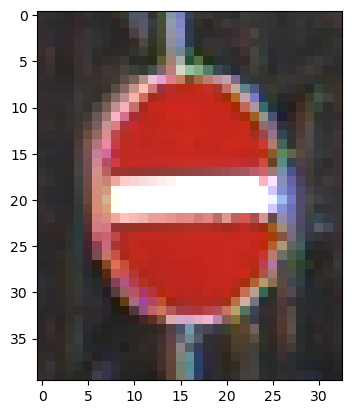

In [16]:
img_num = 200
img = plt.imread("sources/signs/" + test_df["Path"][img_num])
plt.imshow(img)
print("Actual\t\t", test_df["ClassId"][img_num])
print("Predicted\t", predictions[img_num] )